In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Total WA sales by calendar year
revenue = "2014_to_2016_WA_revenue.csv"

revenue_df = fy2015_df = pd.read_csv(revenue)

#Preview of revenue dataframe
revenue_df.tail()

,Date,Sales,Excise Tax Due,Sales (Shelf Price)
940,12/27/2016,3324831.99,752106.45,4076938.44
941,12/28/2016,3452036.10,797870.30,4249906.40
942,12/29/2016,4200475.36,859655.24,5060130.60
943,12/30/2016,5221889.13,1243811.86,6465700.99
944,12/31/2016,3713397.08,1354076.00,5067473.08


In [3]:
#Converted Date column to series with dtype datetime64[ns]
revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])

revenue_df["Date"].tail()

940   2016-12-27
941   2016-12-28
942   2016-12-29
943   2016-12-30
944   2016-12-31
Name: Date, dtype: datetime64[ns]

In [4]:
#Created separate dataframes for each year from 2014 to 2016
dates_2014 = (revenue_df['Date'] > "2013-12-31") & (revenue_df['Date'] <= "2014-12-31")
dates_2015 = (revenue_df['Date'] > "2014-12-31") & (revenue_df['Date'] <= "2015-12-31")
dates_2016 = (revenue_df['Date'] > "2015-12-31") & (revenue_df['Date'] <= "2016-12-31")

revenue_2014_df = revenue_df.loc[dates_2014]
revenue_2015_df = revenue_df.loc[dates_2015]
revenue_2016_df = revenue_df.loc[dates_2016]

revenue_2014_df.tail()

,Date,Sales,Excise Tax Due,Sales (Shelf Price)
209,2014-12-27,5.679374e+05,113587.4750,454349.90
210,2014-12-28,5.139297e+05,102785.9475,411143.79
211,2014-12-29,8.474707e+05,169494.1475,677976.59
212,2014-12-30,6.672432e+05,133448.6300,533794.52
213,2014-12-31,1.947348e+06,389469.6600,1557878.64


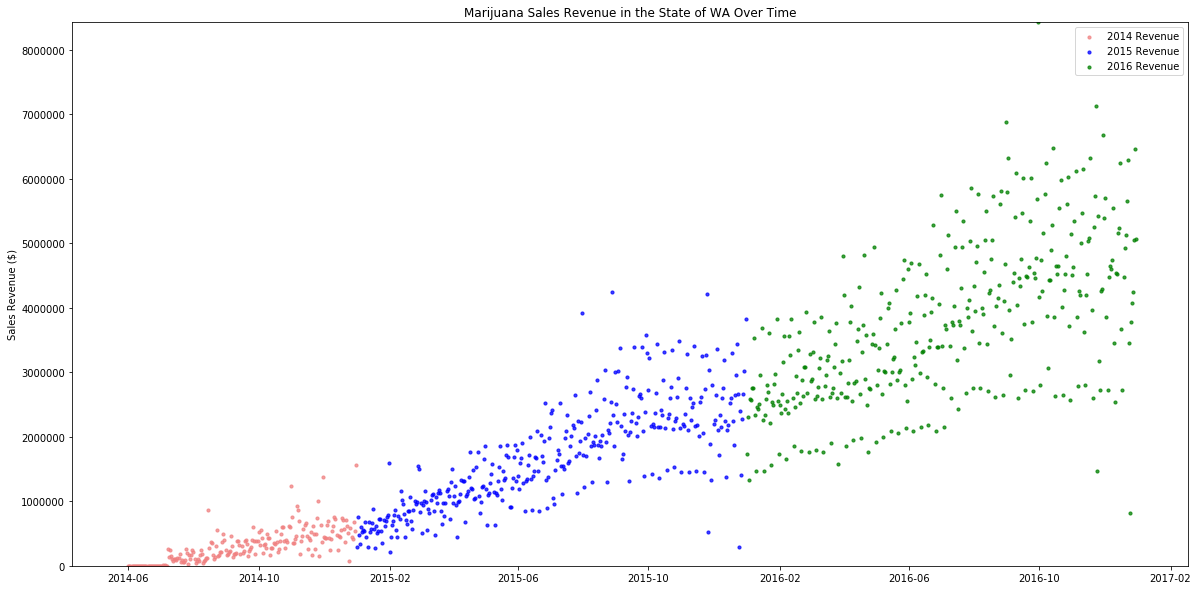

In [8]:
dates_2014 = revenue_2014_df["Date"].tolist()
sales_2014 = revenue_2014_df["Sales (Shelf Price)"]

dates_2015 = revenue_2015_df["Date"].tolist()
sales_2015 = revenue_2015_df["Sales (Shelf Price)"]

dates_2016 = revenue_2016_df["Date"].tolist()
sales_2016 = revenue_2016_df["Sales (Shelf Price)"]

scatter_2014 = plt.scatter(dates_2014, sales_2014, s =10, c = 'lightcoral', alpha=0.75)
scatter_2015 = plt.scatter(dates_2015, sales_2015, s =10, c = 'blue', alpha=0.75)
scatter_2016 = plt.scatter(dates_2016, sales_2016, s =10, c = 'green', alpha=0.75)

plt.title("Marijuana Sales Revenue in the State of WA Over Time")
#plt.xlabel("Date (Since First Sale of Marijuana)")
plt.ylabel("Sales Revenue ($)")
plt.legend((scatter_2014, scatter_2015, scatter_2016), ('2014 Revenue', '2015 Revenue', '2016 Revenue'))

plt.ylim(0,max(sales_2016)+5)
plt.rc('figure', figsize = (20,10))

In [6]:
#Sum of Sales(Shelf Price) for each year to find total revenue per year
revenue_2014_sum = revenue_2014_df["Sales (Shelf Price)"].sum()
revenue_2015_sum = revenue_2015_df["Sales (Shelf Price)"].sum()
revenue_2016_sum = revenue_2016_df["Sales (Shelf Price)"].sum()

revenue_sum_df = pd.DataFrame({
    "Year": ["2014", "2015", "2016"],
    "Revenue": [revenue_2014_sum, revenue_2015_sum, revenue_2016_sum]})

revenue_sum_df

,Year,Revenue
0,2014,6.514394e+07
1,2015,6.150861e+08
2,2016,1.366502e+09
